In [112]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 220.2 kB/s eta 0:07:33
   ---------------------------------------- 0.1/99.8 MB 328.2 kB/s eta 0:05:04
   ---------------------------------------- 0.1/99.8 MB 403.5 kB/s eta 0:04:07
   ---------------------------------------- 0.2/99.8 MB 573.4 kB/s eta 0:02:54
   ---------------------------------------- 0.2/99.8 MB 726.5 kB/s eta 0:02:17
   ---------------------------------------- 0.3/99.8 MB 770.1 kB/s eta 0:02:10
   --------------------------------------

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

1.Скачать или импортировать в notebook датасет Wine,
после чего отобразить первые и последние 5 строк датасета

In [22]:
wine = load_wine(as_frame=True)
print(type(df))
#Это не объект Pandas DataFrame
df = wine.frame
print(type(df))
#Теперь это Pandas DataFrame

<class 'sklearn.utils._bunch.Bunch'>
<class 'pandas.core.frame.DataFrame'>


In [45]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [25]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [26]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


2.Необходимо рассмотреть данные и провести
анализ( количество семплов, типы данных в ячейках,
распределение, корреляция…). Желательно придти к
какому-то выводу после рассмотрения

In [28]:
df.describe()
#В датасете 178 образцов, всего 13 признаковых колонок, и колонка с признаком класса.
#Все признаки числовые (float64), целевой класс - целочисленный (int)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [99]:
df['target'].value_counts()
#Целевых класса 3, они довольно сбалансированы (значит, Accuracy в прниципе можно использовать)

1    71
0    59
2    48
Name: target, dtype: int64

In [39]:
# Поиск пар признаков с корреляцией больше 0.7 по модулю
corr_matrix = df.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (abs(corr_matrix.iloc[i, j]) > 0.7) or (abs(corr_matrix.iloc[i, j]) < -0.7):
            colname = corr_matrix.columns[i]
            print(f'{colname} и {corr_matrix.columns[j]} корреляцируют на {corr_matrix.iloc[i, j]}')

flavanoids и total_phenols корреляцируют на 0.8645635000951147
od280/od315_of_diluted_wines и flavanoids корреляцируют на 0.787193901866951
target и total_phenols корреляцируют на -0.7191633405539715
target и flavanoids корреляцируют на -0.8474975401417585
target и od280/od315_of_diluted_wines корреляцируют на -0.788229588687663


In [40]:
#Как видим 3 признака сильно коррелируют с target классом.
#Высокая корреляция есть так же между малым количеством признаков.

3 Произвести визуализации пункта 2, а также провести
анализ с помощью библиотек matplotlib,seaborn

<Axes: >

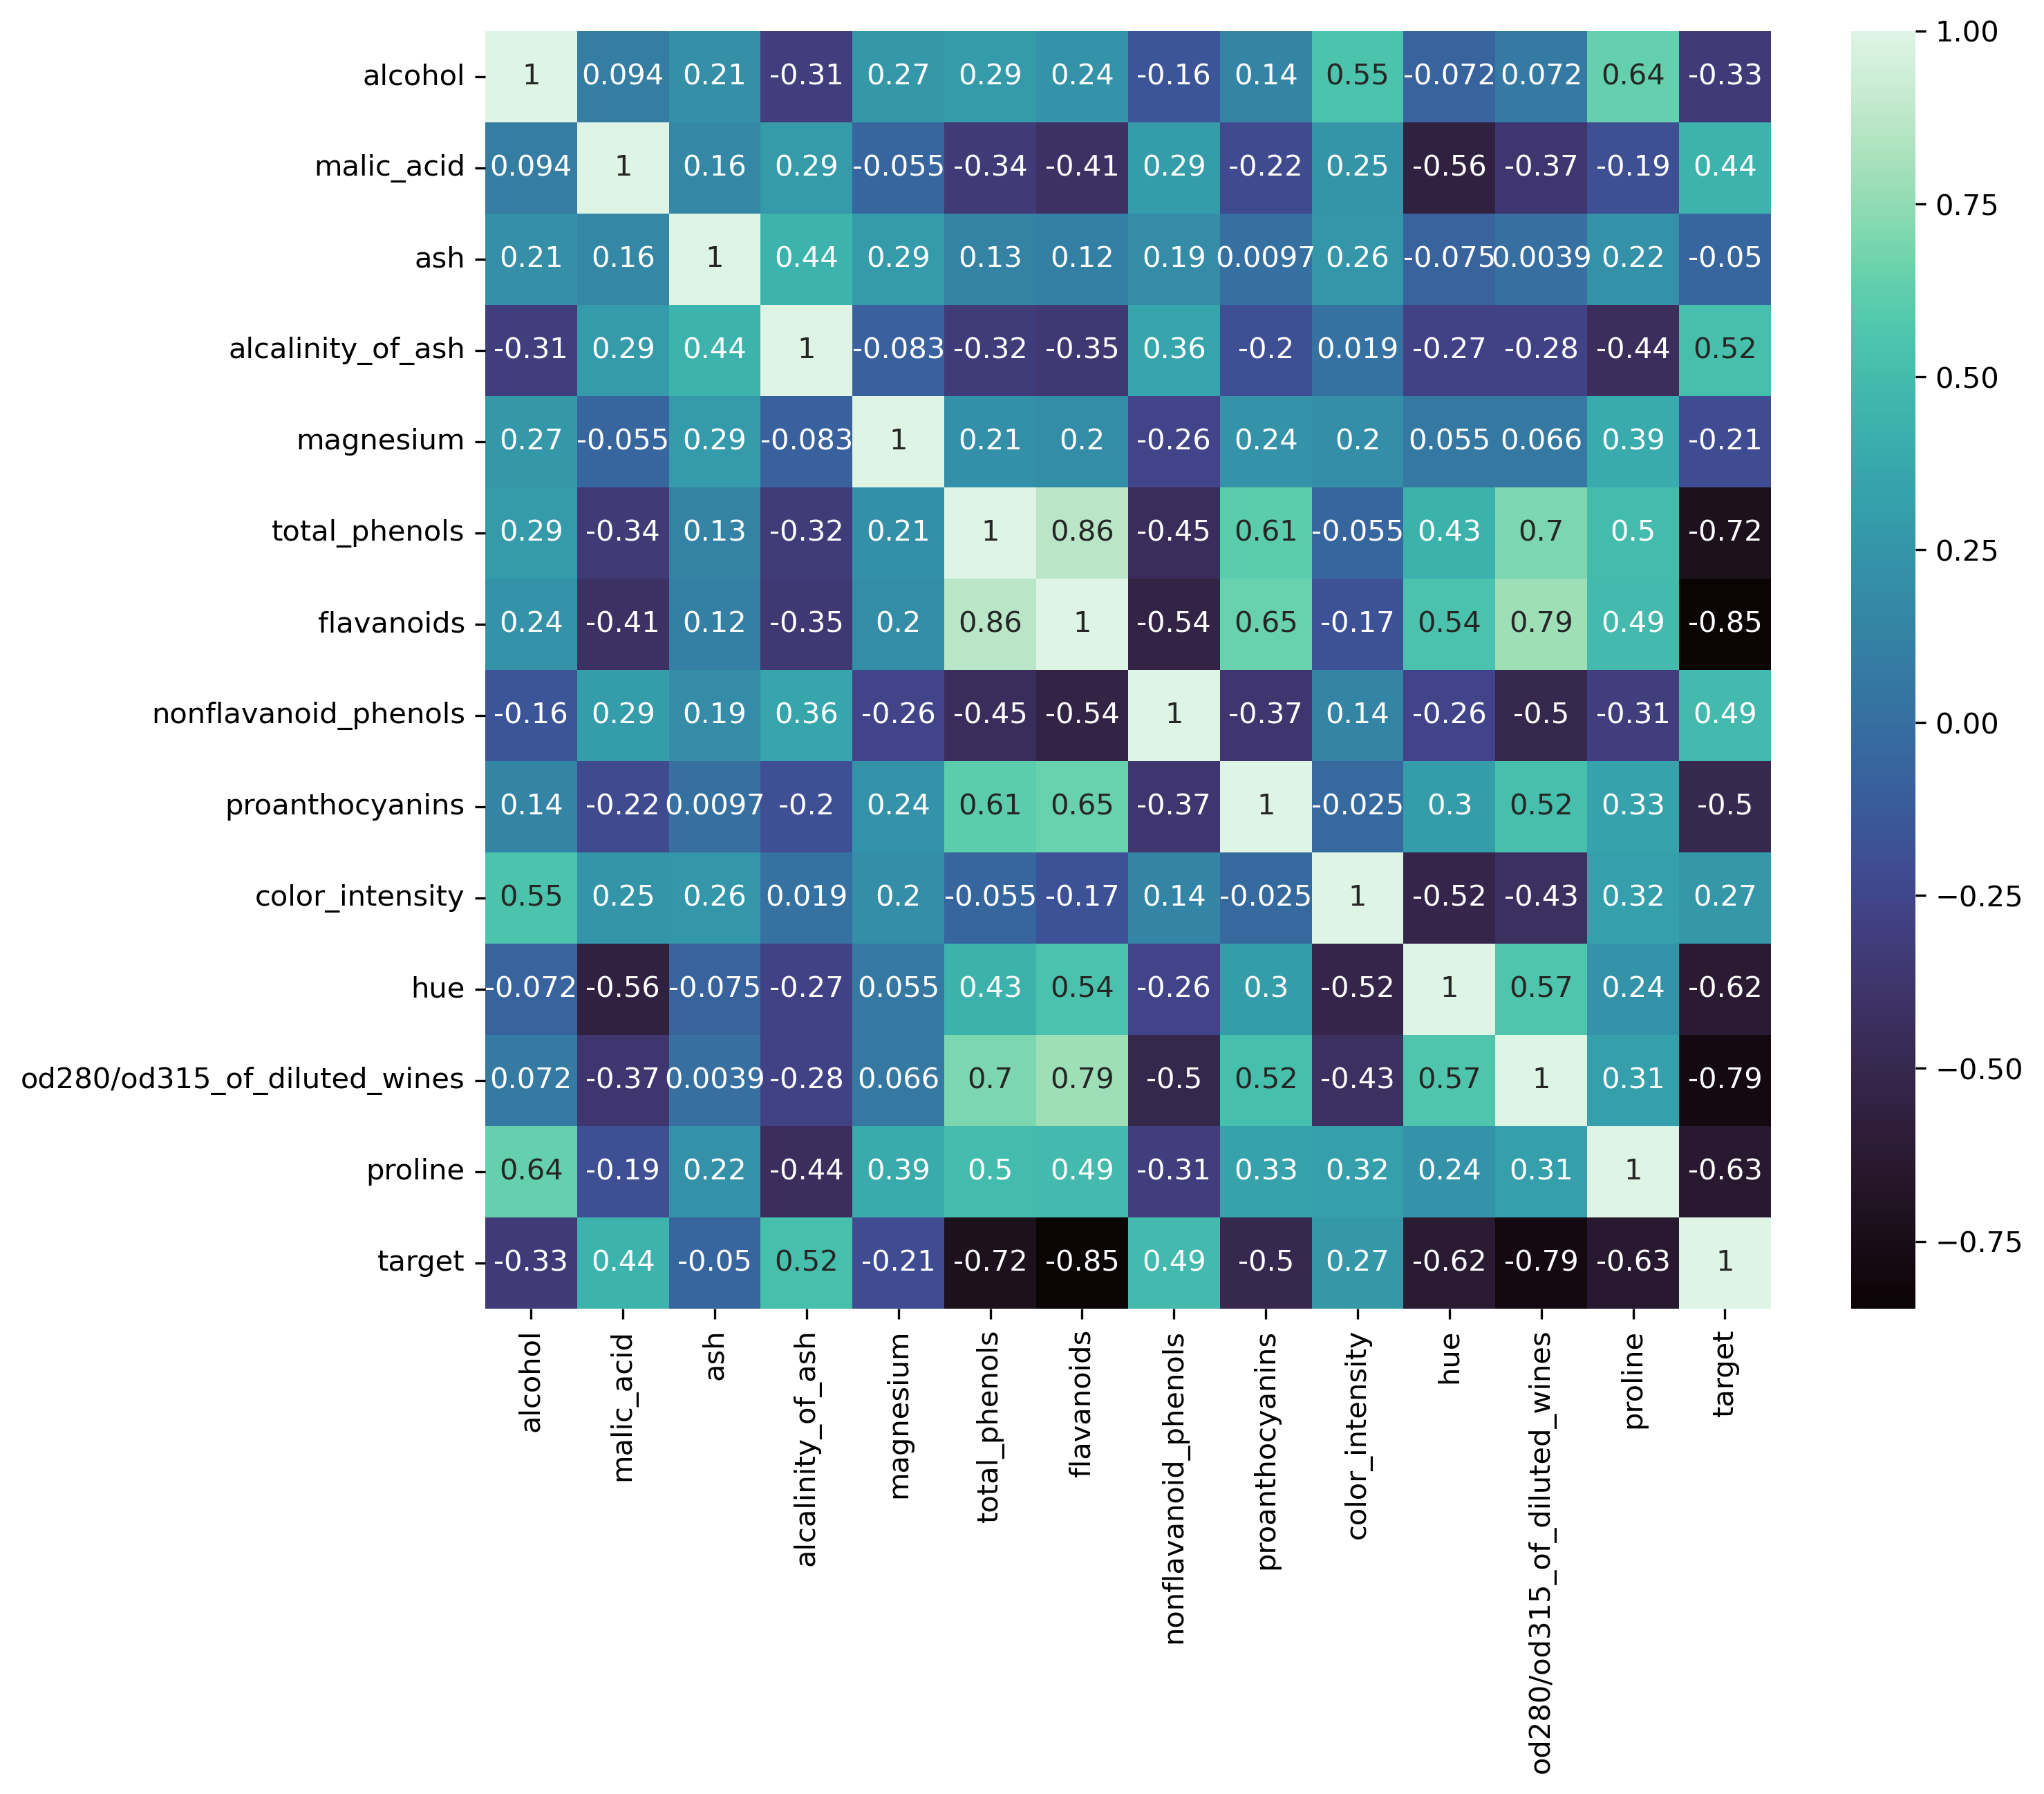

In [41]:
f, ax = plt.subplots(figsize = (10, 8), dpi = 300)
sns.heatmap(corr_matrix, annot=True, cmap='mako', ax = ax)
#Видим, что есть некоторые признаки с сильной прямой или обратной корреляцией.

4.Разбить данные на test и train. Предварительно убрав
колонки с таргетом

In [49]:
y = df['target']
X = df.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
print(len(X_train), len(y_train), len(X_test), len(y_test))

142 142 36 36


5.Обучить decision tree на 2х самых коррелирующих
признаках и не коррелирующих признаках, используя
gini. Посмотреть метрики(f1
score,accuracy,precision,recall), сделать выводы,
построить ConfusionMatrix

F1 score for test set = 0.8363636363636363
Accuracy score for test set = 0.8333333333333334
Precision score for test set = 0.8311688311688311
Recall score for test set = 0.8493265993265994


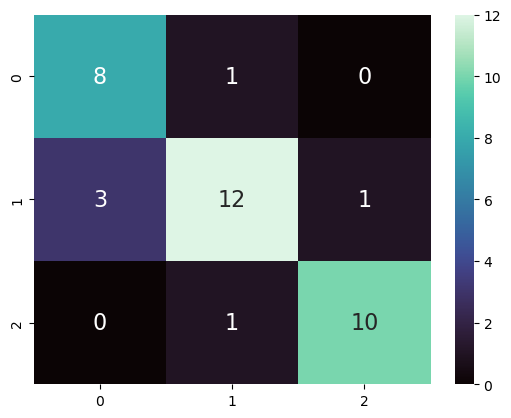

In [172]:
#Обучаем на самых коррелирующих признаках flavanoids od280/od315_of_diluted_wines

X_train_best = pd.concat([X_train['flavanoids'], X_train['od280/od315_of_diluted_wines']], axis = 1)
X_test_best = pd.concat([X_test['flavanoids'], X_test['od280/od315_of_diluted_wines']], axis = 1)
#print(X_train_best)
dt_clf_best = DecisionTreeClassifier(criterion = 'gini', random_state = 22)
dt_clf_best.fit(X_train_best, y_train)

y_pred = dt_clf_best.predict(X_test_best)
f1 = f1_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'F1 score for test set = {f1}')
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print(f'Accuracy score for test set = {acc}')
prec = precision_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'Precision score for test set = {prec}')
rec = recall_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'Recall score for test set = {rec}')
conf_matr = confusion_matrix(y_true = y_test, y_pred = y_pred)
#print(conf_matr)
sns.heatmap(conf_matr, annot = True, cmap = 'mako', annot_kws = {'size': 16})
Y_pred = {}

#Как видим наш классификатор дерево решений хорошо справился с задачей.
#Предсказание нецелевых классов ~17% от общего числа предсказаний

F1 score for test set = 0.34830611010284335
Accuracy score for test set = 0.3888888888888889
Precision score for test set = 0.3647435897435898
Recall score for test set = 0.3497474747474747


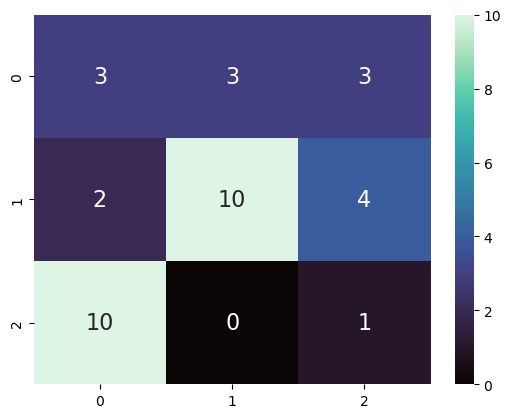

In [173]:
#Обучаем на самых НЕ коррелирующих признаках - это ash и magnesium (из heatmap корредяционной мтарицы)

X_train_worst = pd.concat([X_train['ash'], X_train['magnesium']], axis = 1)
X_test_worst = pd.concat([X_test['ash'], X_test['magnesium']], axis = 1)
#print(X_train_best)
dt_clf_worst = DecisionTreeClassifier(criterion = 'gini', random_state = 22)
dt_clf_worst.fit(X_train_worst, y_train)

y_pred = dt_clf_worst.predict(X_test_worst)
f1 = f1_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'F1 score for test set = {f1}')
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print(f'Accuracy score for test set = {acc}')
prec = precision_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'Precision score for test set = {prec}')
rec = recall_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'Recall score for test set = {rec}')
conf_matr = confusion_matrix(y_true = y_test, y_pred = y_pred)
#print(conf_matr)
sns.heatmap(conf_matr, annot = True, cmap = 'mako', annot_kws = {'size': 16})

#Видим, что наша модель может более-менее точно определять только класс 1 от остальных.
#Модель очеьн плоха

6.Обучить на выбор (SVM, XGboost,RandomForest), на
всех признаках. Получить результат, отобразить
метрики как в пункте 5, в случае обучения методов
использующих деревья отразить важность признаков

F1 score for test set = 0.9717034521788342
Accuracy score for test set = 0.9722222222222222
Precision score for test set = 0.9666666666666667
Recall score for test set = 0.9791666666666666


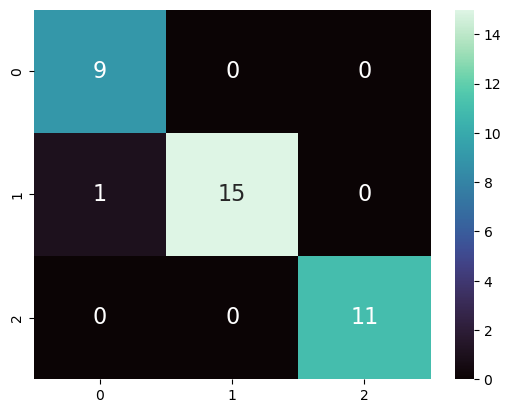

In [174]:
#Обучим все 3 варианта и посмотрим, какой спарвится лучше
#Обучаем RandomForest
rf_clf = RandomForestClassifier(criterion = 'gini', random_state = 22)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
f1 = f1_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'F1 score for test set = {f1}')
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print(f'Accuracy score for test set = {acc}')
prec = precision_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'Precision score for test set = {prec}')
rec = recall_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'Recall score for test set = {rec}')
conf_matr = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(conf_matr, annot = True, cmap = 'mako', annot_kws = {'size': 16})

#Видим, что случайный лес с настройками по умолчанию справился значительно лучше
#одиночного дерева на двух лучших признках

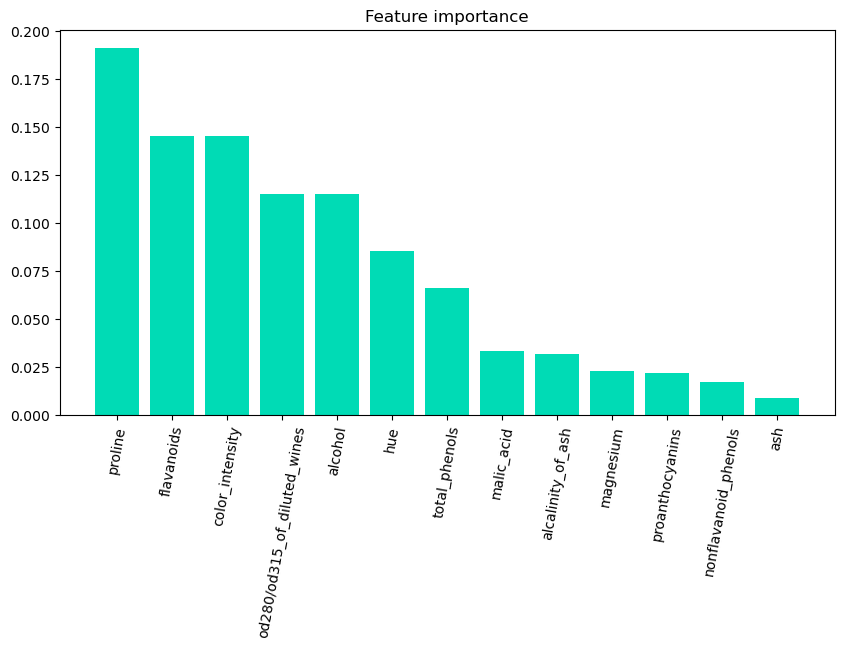

In [169]:
#Важность признаков для RandomForest
importances = rf_clf.feature_importances_
#print(type(importances))
feature_imp = pd.concat([pd.DataFrame(list(X)), pd.DataFrame(importances)], axis = 1)
feature_imp.columns = ['feature', 'importance']
#print(feature_imp)
feature_imp = feature_imp.sort_values('importance', ascending = False)
#print(feature_imp)

color = '#00DBB5'
plt.figure(figsize=(10, 5))
plt.title('Feature importance')
plt.bar(feature_imp['feature'], feature_imp['importance'], color = color)
plt.xticks(rotation=80)
plt.show()

#Интересно, что для него наиболее важными признаками оказались proline, flavanoids и color_intensity

F1 score for test set = 0.512043512043512
Accuracy score for test set = 0.6388888888888888
Precision score for test set = 0.4336677814938685
Recall score for test set = 0.625


C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


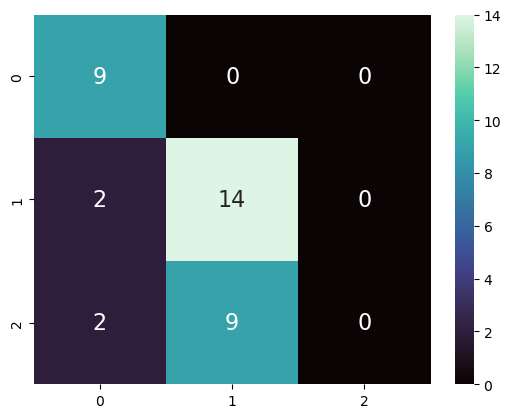

In [175]:
#Обучаем SVM Classifier
svm_clf = SVC(random_state = 22)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)
f1 = f1_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'F1 score for test set = {f1}')
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print(f'Accuracy score for test set = {acc}')
prec = precision_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'Precision score for test set = {prec}')
rec = recall_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'Recall score for test set = {rec}')
conf_matr = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(conf_matr, annot = True, cmap = 'mako', annot_kws = {'size': 16})

#А вот SVM по умолчанию не справился с данной задачей.
#Но это потому что для него надо подбирать гиперпараметры. 

F1 score for test set = 0.9198950455317179
Accuracy score for test set = 0.9166666666666666
Precision score for test set = 0.9141414141414143
Recall score for test set = 0.9280303030303031


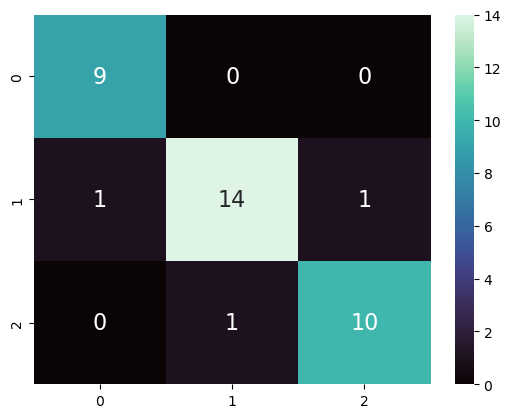

In [176]:
#Обучаем XGBClassifier
xgb_clf = XGBClassifier(random_state = 22)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
f1 = f1_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'F1 score for test set = {f1}')
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print(f'Accuracy score for test set = {acc}')
prec = precision_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'Precision score for test set = {prec}')
rec = recall_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f'Recall score for test set = {rec}')
conf_matr = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(conf_matr, annot = True, cmap = 'mako', annot_kws = {'size': 16})

#Лучше, чем SVM и DecisionTree, но хуже RandomForest

7.Построить график roc curve

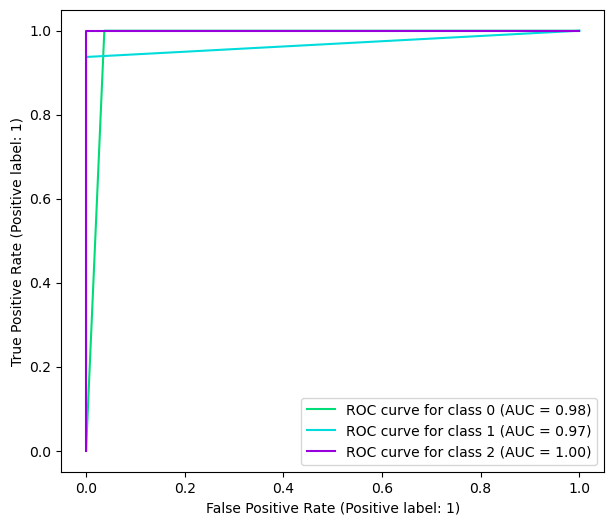

In [214]:
#Построим график для лучшей модели - RandomForest
y_pred = rf_clf.predict(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
fig, ax = plt.subplots(figsize=(7, 6))

colors = cycle(['#00DC77', '#00DCDC', '#9700DC'])

for i, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_pred_bin[:, i], \
                                     name=f"ROC curve for class {i}", color=color, ax=ax)

plt.show()